In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

model = Sequential()
model.add(Dense(16, input_dim = 13, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

In [3]:
model.compile(loss = 'mean_squared_error',
             optimizer = 'adam',
             metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(X_train, y_train, epochs = 50, batch_size = 10)

Epoch 1/50
38/38 [==============================] - 1s 2ms/step - loss: 915.8191 - mse: 915.8191
Epoch 2/50
38/38 [==============================] - 0s 2ms/step - loss: 243.5120 - mse: 243.5120
Epoch 3/50
38/38 [==============================] - 0s 2ms/step - loss: 108.5321 - mse: 108.5322
Epoch 4/50
38/38 [==============================] - 0s 2ms/step - loss: 84.1205 - mse: 84.1205
Epoch 5/50
38/38 [==============================] - 0s 2ms/step - loss: 77.3440 - mse: 77.3440
Epoch 6/50
38/38 [==============================] - 0s 2ms/step - loss: 69.6502 - mse: 69.6502
Epoch 7/50
38/38 [==============================] - 0s 2ms/step - loss: 68.1780 - mse: 68.1780
Epoch 8/50
38/38 [==============================] - 0s 2ms/step - loss: 64.4008 - mse: 64.4008
Epoch 9/50
38/38 [==============================] - 0s 2ms/step - loss: 62.7328 - mse: 62.7328
Epoch 10/50
38/38 [==============================] - 0s 2ms/step - loss: 58.6229 - mse: 58.6229
Epoch 11/50
38/38 [========================

In [5]:
y_pred = model.predict(X_test)
y_pred[0]

4/4 [==============================] - 0s 2ms/step


array([31.092583], dtype=float32)

In [6]:
y_test[0]

24.0

In [7]:
y_test.shape

(127,)

In [8]:
y_pred = np.reshape(y_pred, (127,))

In [9]:
result = pd.DataFrame({'y': y_test.values, 'y_pred': y_pred, 'diff': np.abs(y_test.values - y_pred)})
result.sort_values(by = ['diff'], ascending = False)

,y,y_pred,diff
96,50.0,29.967758,20.032242
18,50.0,37.565712,12.434288
79,7.0,18.904678,11.904678
42,50.0,38.291580,11.708420
97,17.9,6.978148,10.921852
...,...,...,...
85,29.0,28.660149,0.339851
114,31.6,31.332161,0.267839
12,7.0,7.212943,0.212943
47,24.2,24.392014,0.192014


In [10]:
# 과적합 확인
history = model.fit(X_train, y_train, epochs = 500, verbose = 0, validation_split = 0.2)

In [19]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([0, 100])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

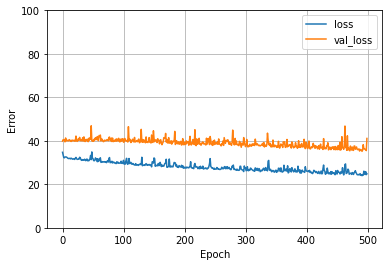

In [20]:
plot_loss(history)

In [21]:
## 손실값이 줄어들지만, 학습이 제대로 되지 않음

In [22]:
# 정규화
from tensorflow.keras.layers.experimental import preprocessing

normalizer = preprocessing.Normalization(axis = -1)
normalizer.adapt(np.array(X_train))

normalized_model = Sequential()
normalized_model.add(normalizer)
normalized_model.add(Dense(16, activation = 'relu'))
normalized_model.add(Dense(1, activation = 'relu'))

normalized_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 13)               27        
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 16)                224       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 268
Trainable params: 241
Non-trainable params: 27
_________________________________________________________________


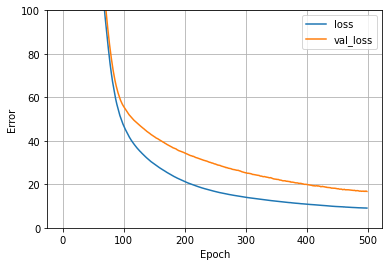

In [23]:
normalized_model.compile(loss = 'mean_squared_error',
                        optimizer = 'adam',
                        metrics = ['mse'])

normalized_history = normalized_model.fit(X_train, y_train, epochs = 500, verbose = 0, validation_split= 0.2)

plot_loss(normalized_history)

4/4 [==============================] - 0s 5ms/step


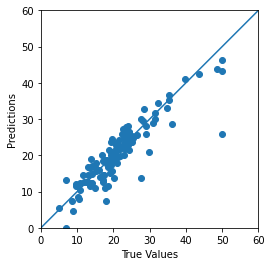

In [24]:
y_pred = normalized_model.predict(X_test).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [25]:
result = pd.DataFrame({'y': y_test.values, 'y_pred': y_pred, 'diff': y_test.values - y_pred, 
                       'diff(abs)': np.abs(y_test.values - y_pred)})
result.sort_values(by = ['diff(abs)'], ascending = False)

,y,y_pred,diff,diff(abs)
96,50.0,25.811747,24.188253,24.188253
111,27.5,13.649124,13.850876,13.850876
97,17.9,7.452739,10.447261,10.447261
15,29.8,20.975494,8.824506,8.824506
113,36.2,28.588791,7.611209,7.611209
...,...,...,...,...
51,35.4,35.343842,0.056158,0.056158
20,25.2,25.144293,0.055707,0.055707
69,12.7,12.750189,-0.050189,0.050189
31,23.8,23.760450,0.039550,0.039550


<AxesSubplot:xlabel='diff', ylabel='Count'>

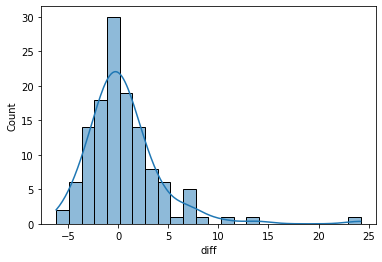

In [26]:
sns.histplot(data = result['diff'], kde = True)